In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [36]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [37]:
def f_xy(x,y):
    if 1 <=y<=6 and 1<=x - y<=6:
        return y*(x-y)/441
    else:
        return 0


In [38]:
xy = [x_set,y_set,f_xy]

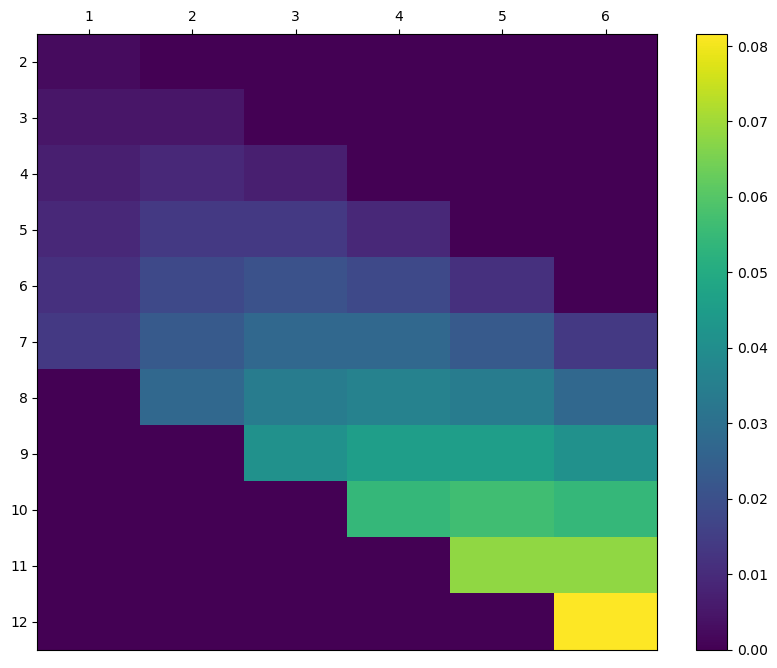

In [39]:
prob = np.array([[f_xy(x_i,y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [40]:
np.all(prob >= 0)

np.True_

In [41]:
def f_x(x):
    return np.sum([f_xy(x, y_k) for y_k in y_set])

In [42]:
def f_y(y):
    return np.sum([f_xy(x_k, y) for x_k in x_set])

In [44]:
x = [x_set, f_x]
y = [y_set, f_y]

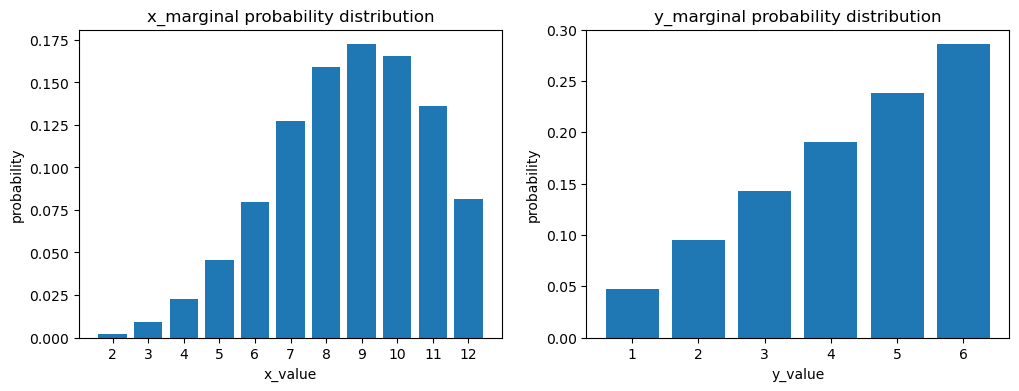

In [47]:
prob_x = np.array([f_x(x_k) for x_k in x_set])
prob_y = np.array([f_y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('x_marginal probability distribution')
ax1.set_xlabel('x_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('y_marginal probability distribution')
ax2.set_xlabel('y_value')
ax2.set_ylabel('probability')

plt.show()


In [48]:
np.sum([x_i * f_xy(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [49]:
def E(xy,g):
    x_set ,y_set ,f_xy = xy
    return np.sum([g(x_i,y_j)* f_xy(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [50]:
mean_x = E(xy, lambda x, y:x)
mean_x

8.667

In [52]:
mean_y = E(xy, lambda x, y:y)
mean_y

4.333

In [53]:
a,b=2,3

In [55]:
E(xy,lambda x,y : a*x + b*y)

30.333

In [58]:
a * mean_x + b * mean_y

30.333

In [60]:
np.sum([(x_i - mean_x)**2 * f_xy(x_i,y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [61]:
def V(xy,g):
    x_set, t_set, f_xy = xy
    mean = E(xy,g)
    return np.sum([(g(x_i,y_j)-mean)**2*f_xy(x_i,y_j)
                    for x_i in x_set for y_j in y_set])

In [62]:
var_x = V(xy, g=lambda x ,y:x)
var_x

4.444

In [64]:
var_y = V(xy, g=lambda x,y:y)
var_y

2.222

In [71]:
def Cov(xy):
    x_set ,y_set ,f_xy = xy
    mean_x = E(xy,lambda x, y:x)
    mean_y = E(xy,lambda x, y:y)
    return np.sum([(x_i-mean_x)*(y_j-mean_y)*f_xy(x_i,y_j)
                    for x_i in x_set for y_j in y_set])

In [72]:
cov_xy = Cov(xy)
cov_xy

2.222

In [73]:
V(xy,lambda x ,y :a*x + b*y)

64.444

In [74]:
a**2 *var_x + b**2 * var_y + 2*a*b* cov_xy

64.444

In [77]:
cov_xy / np.sqrt(var_x * var_y)

0.707